In [40]:
import pandas as pd


In [41]:
# import emails dataset
data=pd.read_csv('Downloads/spam.csv')

In [42]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


preprocessing category data into numerical using label encoder

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
spam=le.fit_transform(data.Category)

In [46]:
spam

array([0, 0, 1, ..., 0, 0, 0])

add spam column into dataframe

In [47]:
data['spam']=spam

In [48]:
data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


 split the data into traning and testing dataframe

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data.Message, data.spam, test_size=0.33, random_state=0)


convert test data of message attribute into vector form

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
cv=CountVectorizer()

In [53]:
x_train_cv=cv.fit_transform(x_train.values)

In [59]:
x_train_cv.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

train the model

In [60]:
from sklearn.naive_bayes import MultinomialNB

use MultinomialNB

In [61]:
model=MultinomialNB()

In [62]:
model.fit(x_train_cv,y_train)

MultinomialNB()

check the accuracy of model

In [63]:
# first tranform the x_test dataframe from text to vector form
x_test_cv=cv.transform(x_test)
model.score(x_test_cv,y_test)

0.9858618814573138

In [66]:
y_predict =model.predict(x_test_cv)

In [68]:
y_predict[:2]

array([0, 1])

In [70]:
# visualize through confusion matrix
from sklearn.metrics import confusion_matrix

In [73]:
cm=confusion_matrix(y_predict,y_test)
cm

array([[1591,   20],
       [   6,  222]], dtype=int64)

In [74]:
# plot on graphim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(33.0, 0.5, 'predicted by model')

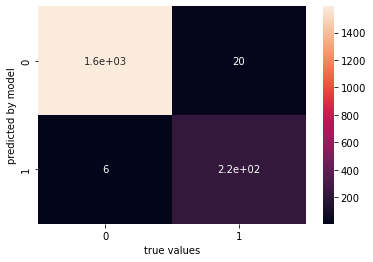

In [75]:
plt.gray()
sns.heatmap(cm,annot=True)
plt.xlabel('true values')
plt.ylabel('predicted by model')
